In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import patheffects

import seaborn as sns

_30k_main_palette_dict = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe_palette_dict = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text_palette_dict = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela Text"
_font_sans = "Gill Sans"

plt.style.use("./utils/minus_thirty_k.mplstyle")

_30k = list(_30k_main_palette_dict.values())
sns.set_palette(_30k)
# ← → ↓ ↑


import warnings
warnings.filterwarnings('ignore')

import datetime

In [2]:
tweets = pd.read_csv("./data/tweets_2019-2020.csv")
accounts = pd.read_csv("./data/users_2019-2020.csv")

tweets['tweet_time'] = pd.to_datetime(tweets["tweet_time"])
accounts["account_creation_date"] = pd.to_datetime(accounts["account_creation_date"])

In [3]:
tweets = tweets.groupby(by=tweets['tweet_time'].dt.date).count()[['tweetid']].reset_index()
tweets = tweets.rename(columns={'tweet_time': 'date', 'tweetid': 'count'})

In [4]:
accounts = accounts.groupby(by=accounts['account_creation_date'].dt.date).count()[['userid']].reset_index()
accounts = accounts.rename(columns={'account_creation_date': 'date', 'userid': 'count'})

In [5]:
tweets.head()

,date,count
0,2019-01-01,1
1,2019-01-24,1
2,2019-03-23,1
3,2019-04-14,1
4,2019-04-15,3


In [6]:
accounts.head()

,date,count
0,2014-10-24,1
1,2016-02-23,1
2,2016-09-26,1
3,2017-09-12,1
4,2019-04-12,1


In [7]:
# drop some account before 2019
accounts = accounts[accounts['date'] >= pd.to_datetime("2019-01-01")]

# Fill missing date

In [8]:
tweets.tail()

,date,count
187,2020-06-07,3
188,2020-06-16,9
189,2020-07-15,3
190,2020-07-16,2
191,2020-07-20,4


In [9]:
date_range = pd.date_range("2019-01-01", "2020-08-01")

In [10]:
tweets.index = tweets['date']
tweets = tweets.reindex(index=date_range)
tweets['date'] = tweets.index
tweets = tweets.reset_index().drop(columns=['index'])
tweets = tweets.fillna(0)

In [11]:
accounts.index = accounts['date']
accounts = accounts.reindex(index=date_range)
accounts['date'] = accounts.index
accounts = accounts.reset_index().drop(columns=['index'])
accounts = accounts.fillna(0)

In [12]:
tweets

,date,count
0,2019-01-01,1.0
1,2019-01-02,0.0
2,2019-01-03,0.0
3,2019-01-04,0.0
4,2019-01-05,0.0
...,...,...
574,2020-07-28,0.0
575,2020-07-29,0.0
576,2020-07-30,0.0
577,2020-07-31,0.0


In [13]:
accounts

,date,count
0,2019-01-01,0.0
1,2019-01-02,0.0
2,2019-01-03,0.0
3,2019-01-04,0.0
4,2019-01-05,0.0
...,...,...
574,2020-07-28,0.0
575,2020-07-29,0.0
576,2020-07-30,0.0
577,2020-07-31,0.0


# smoothing count by n-day rolling

In [14]:
n_day_rolling = 5

In [15]:
tweets['smooth_count'] = tweets['count'].rolling(window=n_day_rolling).mean()
accounts['smooth_count'] = accounts['count'].rolling(window=n_day_rolling).mean()

tweets.fillna(0, inplace=True)
accounts.fillna(0, inplace=True)

In [16]:
tweets.head()

,date,count,smooth_count
0,2019-01-01,1.0,0.0
1,2019-01-02,0.0,0.0
2,2019-01-03,0.0,0.0
3,2019-01-04,0.0,0.0
4,2019-01-05,0.0,0.2


In [17]:
accounts.head()

,date,count,smooth_count
0,2019-01-01,0.0,0.0
1,2019-01-02,0.0,0.0
2,2019-01-03,0.0,0.0
3,2019-01-04,0.0,0.0
4,2019-01-05,0.0,0.0


# create the peak ratio of count, smoothing count

- peak ratio = actual/max

In [18]:
tweets['r_count'] = np.round(tweets['count']/np.max(tweets['count']), 3)
accounts['r_count'] = np.round(accounts['count']/np.max(accounts['count']), 3)

tweets.fillna(0, inplace=True)
accounts.fillna(0, inplace=True)

In [19]:
tweets['r_smooth_count'] = np.round(tweets['smooth_count']/np.max(tweets['smooth_count']), 3)
accounts['r_smooth_count'] = np.round(accounts['smooth_count']/np.max(accounts['smooth_count']), 3)

tweets.fillna(0, inplace=True)
accounts.fillna(0, inplace=True)

In [20]:
tweets.head()

,date,count,smooth_count,r_count,r_smooth_count
0,2019-01-01,1.0,0.0,0.001,0.0
1,2019-01-02,0.0,0.0,0.000,0.0
2,2019-01-03,0.0,0.0,0.000,0.0
3,2019-01-04,0.0,0.0,0.000,0.0
4,2019-01-05,0.0,0.2,0.000,0.0


In [21]:
accounts.head()

,date,count,smooth_count,r_count,r_smooth_count
0,2019-01-01,0.0,0.0,0.0,0.0
1,2019-01-02,0.0,0.0,0.0,0.0
2,2019-01-03,0.0,0.0,0.0,0.0
3,2019-01-04,0.0,0.0,0.0,0.0
4,2019-01-05,0.0,0.0,0.0,0.0


In [22]:
# merge 2 data frame

accounts['date'] = pd.to_datetime(accounts['date'])

df = pd.merge(tweets, accounts, how='outer', on='date', suffixes=['_tw', '_acc'])

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date', ignore_index=True)

In [23]:
# select only interesting events

df = df[(df['date'] >= pd.to_datetime("2019-11-01")) & (df['date'] <= pd.to_datetime("2020-03-15"))]
df = df.reset_index().drop(columns=['index'])

In [24]:
df

,date,count_tw,smooth_count_tw,r_count_tw,r_smooth_count_tw,count_acc,smooth_count_acc,r_count_acc,r_smooth_count_acc
0,2019-11-01,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
1,2019-11-02,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
2,2019-11-03,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
3,2019-11-04,3.0,0.6,0.002,0.001,6.0,1.2,0.113,0.05
4,2019-11-05,6.0,1.8,0.004,0.002,11.0,3.4,0.208,0.14
...,...,...,...,...,...,...,...,...,...
131,2020-03-11,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
132,2020-03-12,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
133,2020-03-13,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
134,2020-03-14,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00


# Visualisation

In [25]:
ticks_date = df[df['date'].dt.day == 1]['date'].dt.strftime("%Y\n%b")
ticks_date

0      2019\nNov
30     2019\nDec
61     2020\nJan
92     2020\nFeb
121    2020\nMar
Name: date, dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                136 non-null    datetime64[ns]
 1   count_tw            136 non-null    float64       
 2   smooth_count_tw     136 non-null    float64       
 3   r_count_tw          136 non-null    float64       
 4   r_smooth_count_tw   136 non-null    float64       
 5   count_acc           136 non-null    float64       
 6   smooth_count_acc    136 non-null    float64       
 7   r_count_acc         136 non-null    float64       
 8   r_smooth_count_acc  136 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 9.7 KB


In [27]:
df

,date,count_tw,smooth_count_tw,r_count_tw,r_smooth_count_tw,count_acc,smooth_count_acc,r_count_acc,r_smooth_count_acc
0,2019-11-01,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
1,2019-11-02,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
2,2019-11-03,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
3,2019-11-04,3.0,0.6,0.002,0.001,6.0,1.2,0.113,0.05
4,2019-11-05,6.0,1.8,0.004,0.002,11.0,3.4,0.208,0.14
...,...,...,...,...,...,...,...,...,...
131,2020-03-11,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
132,2020-03-12,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
133,2020-03-13,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00
134,2020-03-14,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.00


In [28]:
df.max()

date                  2020-03-15 00:00:00
count_tw                           1352.0
smooth_count_tw                     991.6
r_count_tw                            1.0
r_smooth_count_tw                     1.0
count_acc                            53.0
smooth_count_acc                     24.2
r_count_acc                           1.0
r_smooth_count_acc                    1.0
dtype: object

In [29]:
acc_tick_v = np.round(np.linspace(0, df.max()['count_acc'] * 1.2, 7), -1)
acc_tick_v

array([ 0., 10., 20., 30., 40., 50., 60.])

In [30]:
tw_tick_v = np.round(np.linspace(0, df.max()['count_tw'] * 1.2, 5), -1)

In [31]:
acc_tick_r = np.round(acc_tick_v/df.max()['count_acc'], 2)
tw_tick_r = np.round(tw_tick_v/df.max()['count_tw'], 2)

In [32]:
x_tick_r = np.append(-acc_tick_r[1::][::-1], tw_tick_r[:])
x_tick_v = np.append(acc_tick_v[1::][::-1], tw_tick_v[:]).astype(np.int)

x_tick_r, x_tick_v

(array([-1.13, -0.94, -0.75, -0.57, -0.38, -0.19,  0.  ,  0.3 ,  0.6 ,
         0.9 ,  1.2 ]),
 array([  60,   50,   40,   30,   20,   10,    0,  410,  810, 1220, 1620]))

In [33]:
def plot_hline(y):
    return plt.axhline(y, linewidth=0.5, alpha=0.5, linestyle='dashed', color=_30k_text_palette_dict['text_lighter2'])

In [34]:
def format_date(date):
    return date.dt.strftime("%d %b").values[0]

def plot_text_outlined(x, y, s, fs, ha='left'):
    return plt.text(x=x, y=y, s=s,
             path_effects=[patheffects.Stroke(linewidth=2.5, foreground='white', alpha=0.9),
                            patheffects.Normal()],
             fontsize=fs, fontfamily="Metric",
             ha=ha, va='bottom')

In [35]:
events = {
    "2019-12-12": "Royal Barge Procession",
    "2020-02-08": "Nakhon Ratchasima Shootings",
    "2020-02-21": "FFP has been dissolved",
    "2020-02-24": "TH-US Hunuman Guardian\n(Exercise Event)",
    "2020-02-27": "Flash mob",
    "2020-01-13": "1st COVID case outside China\nwas found in Thailand",
}

events_df = pd.DataFrame({"date": events.keys(), "event": events.values()})
events_df['date'] = pd.to_datetime(events_df['date'])
events_df = events_df.sort_values(by='date', ignore_index=True)

events_df

,date,event
0,2019-12-12,Royal Barge Procession
1,2020-01-13,1st COVID case outside China\nwas found in Tha...
2,2020-02-08,Nakhon Ratchasima Shootings
3,2020-02-21,FFP has been dissolved
4,2020-02-24,TH-US Hunuman Guardian\n(Exercise Event)
5,2020-02-27,Flash mob


In [36]:
(events_df.loc[0]['date'] - events_df.loc[1]['date']).days

-32

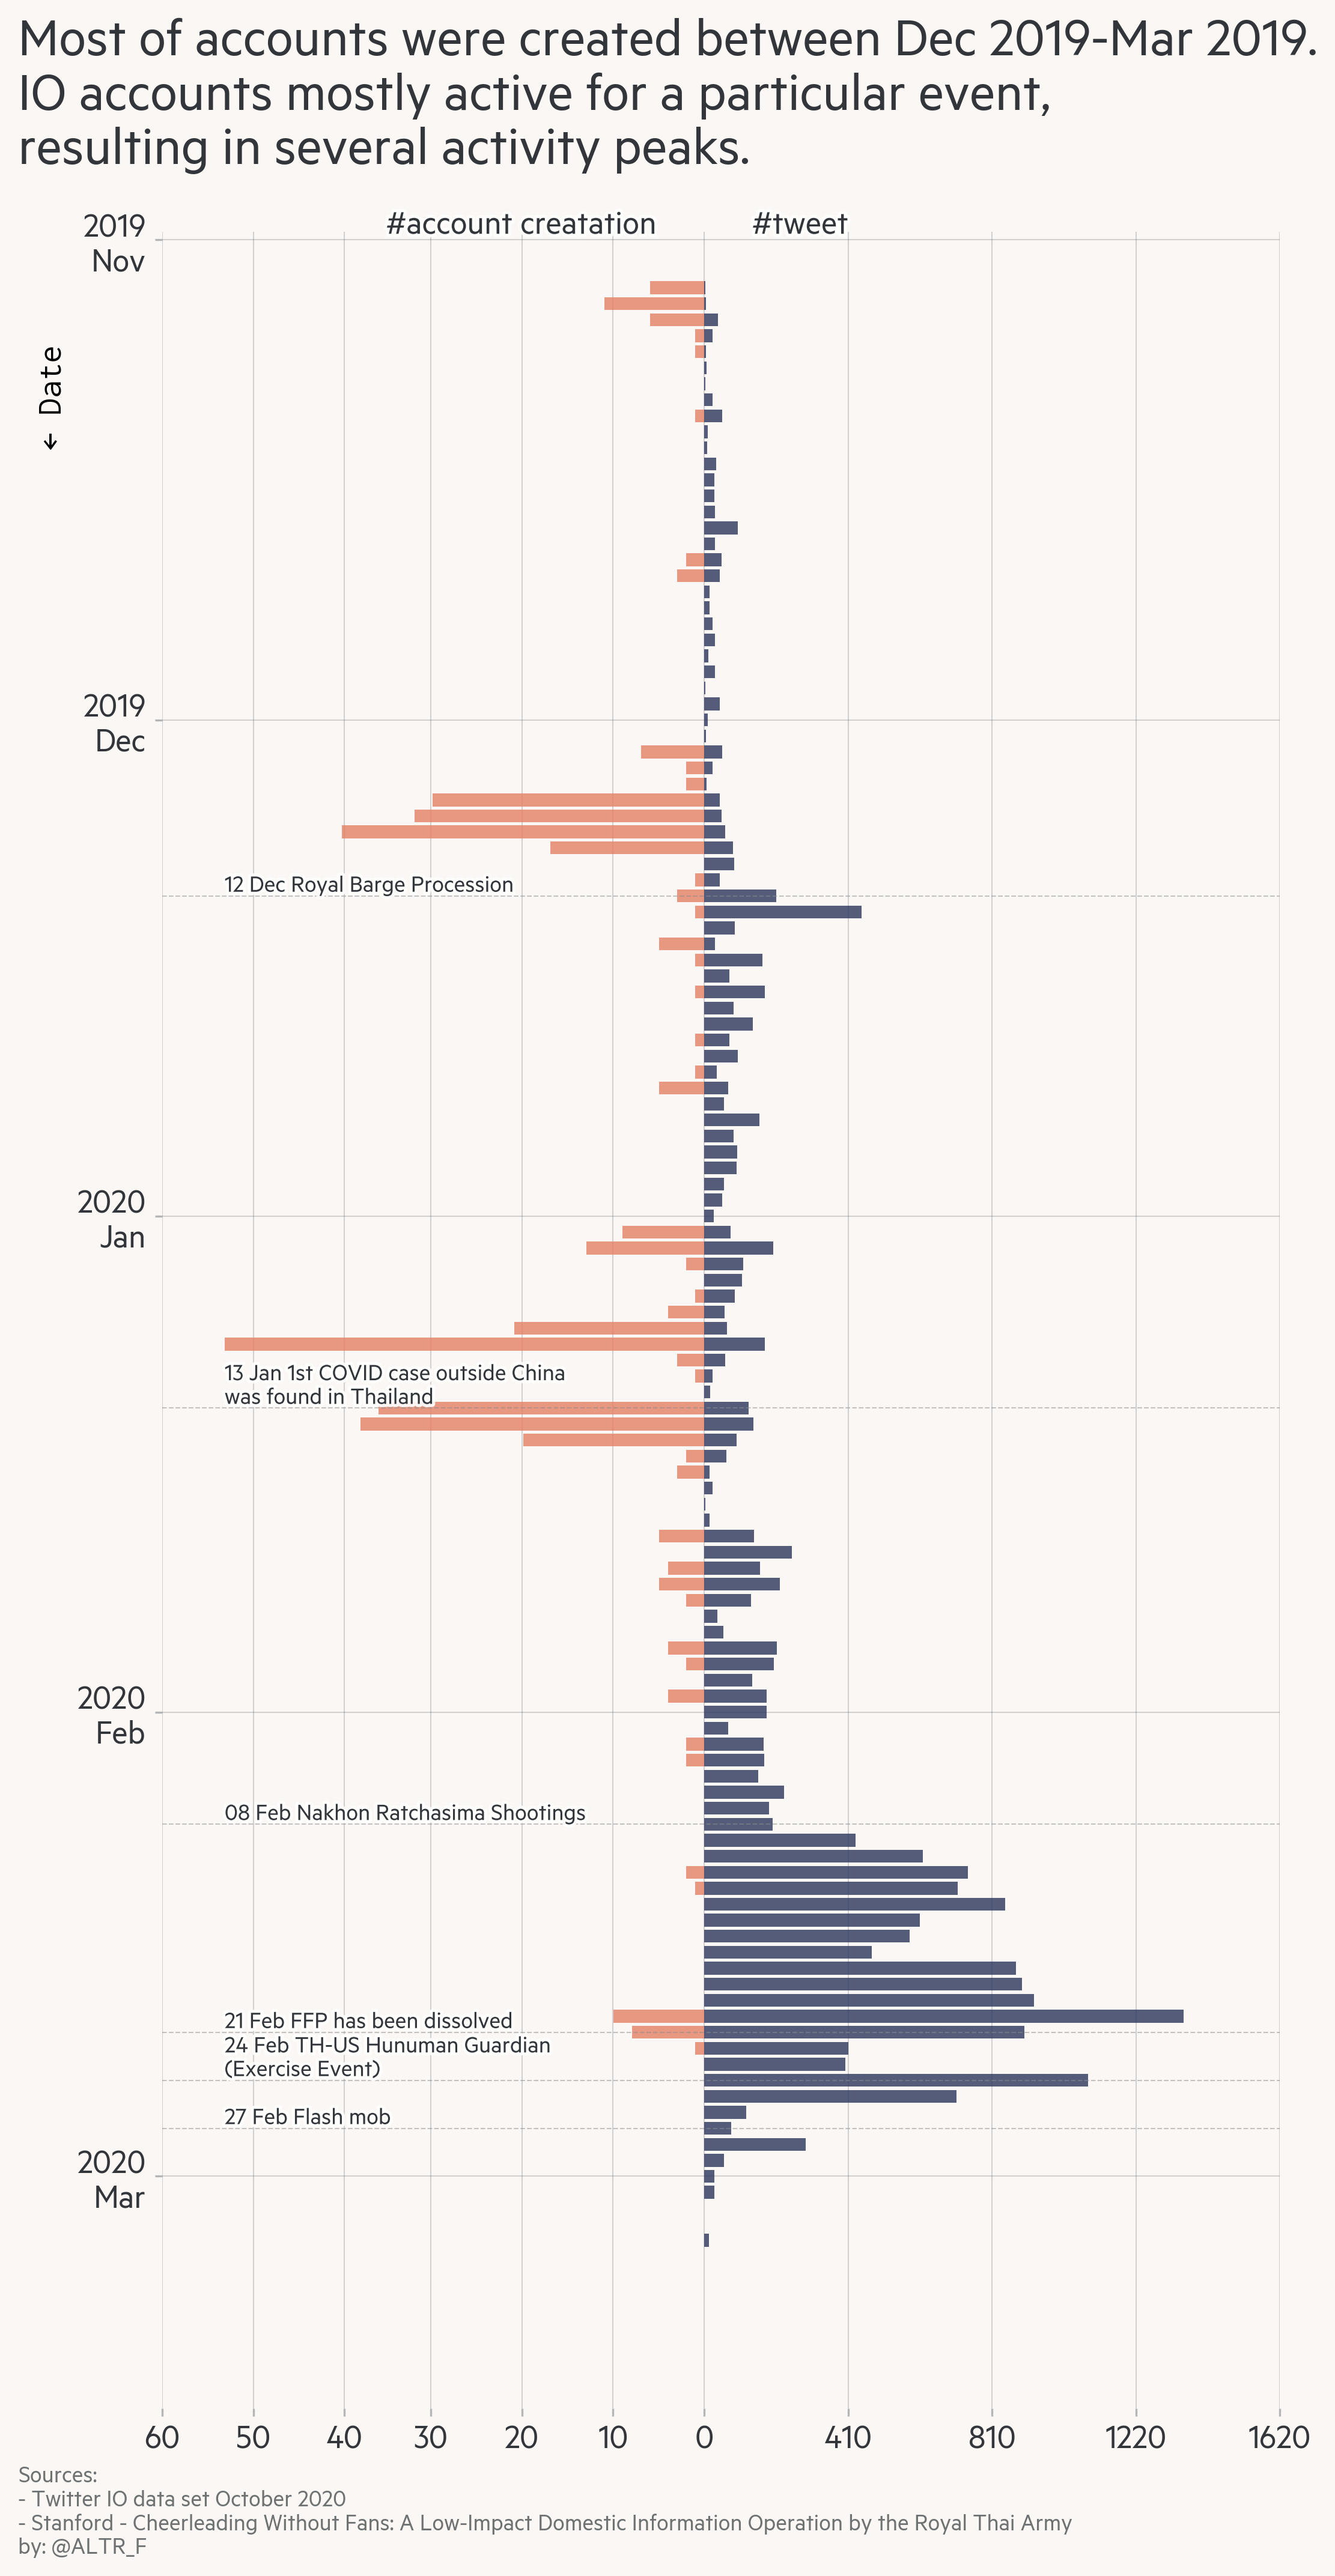

In [45]:
base_fs = 14
small_fs = base_fs/1.414
ff = "Metric"

fig = plt.figure(figsize=(8, 8*2))


sns.barplot(df['r_count_tw'], df['date'], 
            color=_30k_main_palette_dict['blue'], saturation=0.7, alpha=0.8, label='tweet')
sns.barplot(-df['r_count_acc'], df['date'], 
            color=_30k_main_palette_dict['orange'], saturation=0.7, alpha=0.8, label='account creation')



#########
# annotation
#########

text = "#tweet"
plot_text_outlined(0.1, df.index[0], text, base_fs)

text = "#account creatation"
plot_text_outlined(-0.1, df.index[0], text, base_fs, ha='right')

for i, row in events_df.iterrows():
    event = df[df['date'] == pd.to_datetime(row["date"])]
    text = f"{format_date(event['date'])} " + row["event"]
    plot_hline(event.index[0])
    plot_text_outlined(-1, event.index[0], text, fs=small_fs)

     
#########
# chart element
#########

ax = plt.gca()

# title = "Timeline of events"
# plt.title(title, fontsize=base_fs, fontfamily=ff, y=ax.get_position().y1+0.15)


x0_offset = -0.1

title = """Most of accounts were created between Dec 2019-Mar 2019.
IO accounts mostly active for a particular event,
resulting in several activity peaks."""
fig.suptitle(title, fontsize=base_fs*1.618, fontfamily=ff, 
             x=ax.get_position().x0+x0_offset, y=ax.get_position().y1+0.02, 
             ha='left', va='bottom'
            )

plt.yticks(ticks_date.index, ticks_date, fontsize=base_fs, fontfamily=ff)
plt.xticks(x_tick_r, x_tick_v, fontsize=base_fs, fontfamily=ff)

plt.xlabel("")
plt.ylabel("← Date", fontsize=base_fs, va="bottom", y=0.9, ha="left")
# plt.legend(fontsize=small_fs, prop={"fontfamily": ff})


footnote = f"""\
Sources:
- Twitter IO data set October 2020
- Stanford - Cheerleading Without Fans: A Low-Impact Domestic Information Operation by the Royal Thai Army
by: @ALTR_F"""
plt.figtext(s=footnote, 
            x=ax.get_position().x0+x0_offset, y=ax.get_position().y0-0.02,
            fontsize=small_fs, color=_30k_text_palette_dict['text_lighter1'],
            fontfamily=ff, ha="left", va="top"
           )

plt.grid(True, alpha=0.2)
sns.despine(bottom=True, left=True)
plt.show()

In [38]:
a = pd.read_csv("./data/tweets_2019-2020.csv")
a['tweet_time'] = pd.to_datetime(a['tweet_time'])


In [39]:
b = a[(a['tweet_time'] >= pd.to_datetime("2020-02-27")) & (a['tweet_time'] < pd.to_datetime("2020-02-28"))]

for t in b.sample(10)['tweet_text']:
    print(t)

@MatichonOnline การไปทำกิจกรรมที่มีคนแออัด เสี่ยงต่อการแพร่บาดของไวรัส แล้วควบคุมการกระจายของเชื้อโรคไม่ได้นะคะ เราต้องคำนึงด้วย
RT @army2pr: #วิบวับทัพภาค2พร้อมแล้วแถลงข่าวจัดการแข่งขันกีฬาภายในกองทัพบก  โดยกีฬาภายในกองทัพบกจะจัดขึ้นในระหว่างวันที่6-11มีนาคม นี้ อย่า…
RT @3_INFANTRY_DIV: กองพันทหารราบที่ 2 กรมทหารราบที่ 13 ฝึกเตรียมความพร้อมชุดปฏิบัติการหน่วยทหารขนาดเล็ก ประจำปี 2563

#กองพันทหารราบที่2กร…
RT @army2pr: #saveภูกระดึง   🇹🇭🇹🇭🇹🇭
#กองทัพบก 
#กองทัพภาคที่2 https://t.co/gAOdLkLqN0
นี่และ ยิ่งพวกมึงทำแบบนี้ ทหารเขายิ่งชอบ พวกข้อศอกหมา #โรงเรียนเจ้าห้าวมากไม่ได้ https://t.co/TviDuJ5wXn
ครอบครัวของฉันเล่น Cashzine App เพื่อรับเงินฟรี ในแต่ละเดือนแม่ของฉันซื้ออาหารและปรุงอาหาร เติมโทรศัพท์ เติมน้ำมัน พึ่งพามัน ... คุณต้องเข้าร่วมด้วย! คลิกลิงค์ด้านล่างเพื่อรับฟรี 8000 เหรียญ:

https://t.co/J1cPdKkUJ9
RT @RedBuffaloFre: สิ่งที่นักศึกษาต้องการ คือ เปลี่ยนแปลงการปกครอง จากสถาบันกษัตริย์ ให้เป็น ประธานาธิบดี  (ประชาธิปไตยของเพื่อไทย ของอนาคต…
RT @3_INFANTRY_DIV: 🥬ผลผลิตออกแล้ว เพราะ